# PROJET 7

# IMPLEMENTEZ UN MODELE DE SCORING





## NOTEBOOK - FEATURE IMPORTANCE GLOBALE & LOCALE

In [1]:
#pip install wheel

In [2]:
#pip install daal==2021.4.0

In [3]:
#pip install numpy==1.20

In [4]:
#pip install xplotter

In [5]:
#pip install shap

In [6]:
#pip install numba==0.53.0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMClassifier

import re

In [2]:
import shap

In [3]:
pkl_model= open("best_lgbm.pkl","rb")
best_LGBM=pd.read_pickle(pkl_model)

In [4]:
best_LGBM

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('sampler', RandomUnderSampler()),
                ('estimator', LGBMClassifier())])

In [11]:
best_LGBM[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [12]:
best_LGBM[1]

SimpleImputer(strategy='median')

In [13]:
best_LGBM[2]

StandardScaler()

In [14]:
best_LGBM[:3]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [15]:
best_LGBM[4]

LGBMClassifier()

In [5]:
train=pd.read_csv('data_work/data_train.csv', sep ='\t')

In [17]:
train=train.sample(frac=0.5)
train.shape

(153756, 95)

In [18]:
train.head()

Unnamed: 0 NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
83323        83323         Cash loans           F            N   
299998      299998         Cash loans           F            Y   
86266        86266         Cash loans           F            N   
255619      255619         Cash loans           F            Y   
216512      216512         Cash loans           M            N   

        AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
83323           225000.0    337500.0      19503.0         337500.0   
299998          135000.0    392427.0      14224.5         324000.0   
86266            90000.0    298512.0      17266.5         270000.0   
255619          112500.0    675000.0      26901.0         675000.0   
216512          225000.0    755190.0      36459.0         675000.0   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  ...  \
83323     State servant  Secondary / secondary special  ...   
299998        Pensioner                Lower secondary  ...   
86266         Pensioner  Secondary / secondary special  ...   
255619    State servant  Secondary / secondary special  ...   
216512    State servant               Higher education  ...   

       PREV_APPL_MEAN_INSTALL_MEAN_NUM_INSTALMENT_NUMBER  \
83323                                           4.500000   
299998                                         12.142857   
86266                                           4.500000   
255619                                         16.543685   
216512                                          3.666667   

        PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
83323                                      0.397260   
299998                                     3.157722   
86266                                      0.550685   
255619                                     3.335840   
216512                                     1.056621   

        PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
83323                                 16816.545000   
299998                                26731.562455   
86266                                 13869.072000   
255619                                 7468.766934   
216512                                52397.466000   

        PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  CREDIT_INCOME_PERCENT  \
83323                              16816.545000               1.500000   
299998                             26456.120214               2.906867   
86266                              13869.072000               3.316800   
255619                              6665.067425               6.000000   
216512                             52397.466000               3.356400   

        ANNUITY_INCOME_PERCENT  CREDIT_TERM  DAYS_EMPLOYED_PERCENT TARGET  \
83323                 0.086680    17.305030               0.133758    0.0   
299998                0.105367    27.588105             -15.764297    0.0   
86266                 0.191850    17.288507             -18.163161    0.0   
255619                0.239120    25.092004               0.300952    1.0   
216512                0.162040    20.713404               0.168278    0.0   

        SK_ID_CURR  
83323     196641.0  
299998    447545.0  
86266     200118.0  
255619    395782.0  
216512    350873.0  

[5 rows x 95 columns]

In [6]:
X=train.drop(['SK_ID_CURR','TARGET','Unnamed: 0'],axis=1)
X.shape

(307511, 92)

In [7]:
best_LGBM[:4]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('sampler', RandomUnderSampler())])

In [9]:
y=train['TARGET']
y.shape

(307511,)

In [21]:
cat_feat=X.select_dtypes(include=object).columns.to_list()
num_feat=X.select_dtypes(exclude=object).columns.to_list()

In [22]:
X_cat=X[cat_feat]
X_num=X[num_feat]

In [64]:
best_LGBM[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [23]:
# Créer une instance de OneHotEncoder
encoder = best_LGBM[0]
# Adapter l'encodeur aux données
encoder.fit(X_cat)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
                                  'FLAG_OWN_CAR', 'NAME_INCOME_TYPE',
                                  'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                                  'OCCUPATION_TYPE',
                                  'WEEKDAY_APPR_PROCESS_START',
                                  'ORGANIZATION_TYPE'])])

In [24]:
feature_names_out = encoder.get_feature_names_out(input_features=X_cat.columns) # Obtenir les noms de colonnes étendus
X_cat_encoded = encoder.transform(X_cat) # Transformer les données
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=feature_names_out, index=X.index)# Convertir la matrice creuse en DataFrame


In [25]:
X_VF = pd.concat([X_num,X_cat_encoded_df],axis=1)

In [26]:
X_VF.shape

(153756, 192)

In [27]:
X_VF_Imputer=pd.DataFrame(best_LGBM[1].fit_transform(X_VF),columns=X_VF.columns)
X_VF_Imputer.shape

(153756, 192)

In [28]:
X_VF_Scaler=pd.DataFrame(best_LGBM[2].fit_transform(X_VF_Imputer),columns=X_VF_Imputer.columns)
X_VF_Scaler.shape

(153756, 192)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_VF_Scaler,y,test_size=0.2)

In [30]:

X_train_sample,y_train_sample=best_LGBM[3].fit_resample(X_train,y_train)

In [31]:
X_train_sample.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
81685          -0.267179   -0.370700    -0.351392        -0.239731   
174            -0.853214   -0.134413    -0.041855        -0.239731   
38938          -0.309039   -0.930089    -0.659998        -0.849428   
147846         -0.057881   -0.258822    -0.163126        -0.117791   
2748           -0.476477    0.868863     0.051503         0.382160   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
81685                     0.565371   -0.755174       0.477986   
174                      -1.137780   -0.821592       0.464656   
38938                    -1.288043   -1.411799       0.461765   
147846                    1.081624   -0.407738       0.452353   
2748                      0.716865    0.729847       0.452325   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  \
81685            0.506838         0.678400    -1.271819  ...   
174             -1.045021        -0.473213    -0.145415  ...   
38938           -1.267525        -1.531452    -0.145415  ...   
147846          -1.354826         1.026732    -0.990218  ...   
2748             1.664141        -0.157330    -0.145415  ...   

        OneHot__ORGANIZATION_TYPE_Trade: type 4  \
81685                                  -0.01397   
174                                    -0.01397   
38938                                  -0.01397   
147846                                 -0.01397   
2748                                   -0.01397   

        OneHot__ORGANIZATION_TYPE_Trade: type 5  \
81685                                 -0.011688   
174                                   -0.011688   
38938                                 -0.011688   
147846                                -0.011688   
2748                                  -0.011688   

        OneHot__ORGANIZATION_TYPE_Trade: type 6  \
81685                                 -0.044656   
174                                   -0.044656   
38938                                 -0.044656   
147846                                -0.044656   
2748                                  -0.044656   

        OneHot__ORGANIZATION_TYPE_Trade: type 7  \
81685                                 -0.160664   
174                                   -0.160664   
38938                                 -0.160664   
147846                                -0.160664   
2748                                  -0.160664   

        OneHot__ORGANIZATION_TYPE_Transport: type 1  \
81685                                     -0.026635   
174                                       -0.026635   
38938                                     -0.026635   
147846                                    -0.026635   
2748                                      -0.026635   

        OneHot__ORGANIZATION_TYPE_Transport: type 2  \
81685                                     -0.084067   
174                                       -0.084067   
38938                                     -0.084067   
147846                                    -0.084067   
2748                                      -0.084067   

        OneHot__ORGANIZATION_TYPE_Transport: type 3  \
81685                                     -0.060514   
174                                       -0.060514   
38938                                     -0.060514   
147846                                    -0.060514   
2748                                      -0.060514   

        OneHot__ORGANIZATION_TYPE_Transport: type 4  \
81685                                     -0.134197   
174                                       -0.134197   
38938                                     -0.134197   
147846                                    -0.134197   
2748                                      -0.134197   

        OneHot__ORGANIZATION_TYPE_University  OneHot__ORGANIZATION_TYPE_XNA  
81685                              -0.066354                      -0.467767  
174                                -0.066354                      -0.467767  
38938                    

In [32]:
X_train_sample.shape

(19848, 192)

### PARTIE 1 - FEATURE IMPORTANCE GLOBAL

In [33]:
X_train_sample = X_train_sample.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [34]:
# Récupération des shap_values par le paramètre `pred_contrib` de la fonction predict de LGBM
model_LGBM = best_LGBM[4].fit(X_train_sample, y_train_sample)



[LightGBM] [Info] Number of positive: 9924, number of negative: 9924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051947 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15697
[LightGBM] [Info] Number of data points in the train set: 19848, number of used features: 173
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [35]:
shap_values_lgbm =  model_LGBM.predict(X_train_sample, pred_contrib=True)

In [36]:
# explain the model
explainer = shap.TreeExplainer(model_LGBM)
shap_values_all = explainer(X_train_sample)

In [37]:
print(f"Valeur de Référence moyenne : {shap_values_all.base_values[0]}")

Valeur de Référence moyenne : [-0.00439333  0.00439333]


### Diagramme des variables (Moyenne valeurs absolues)

In [38]:
shap_values = explainer.shap_values(X_train_sample)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [39]:
shap_values_df = pd.DataFrame(data=shap_values[1], columns=X_train_sample.columns)
shap_values_df.shape

(19848, 192)

In [40]:
shap_values_df.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0          0.001153   -0.012777    -0.038743         0.093555   
1         -0.003450    0.033077     0.134293         0.179476   
2          0.000534   -0.029452    -0.082880         0.053282   
3          0.000391   -0.038465    -0.013793        -0.095610   
4          0.005331    0.036423     0.089868        -0.136948   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.012147   -0.005414      -0.109302          -0.013297   
1                   -0.024515    0.095906      -0.031965          -0.035194   
2                    0.046636    0.108760      -0.011835           0.038544   
3                   -0.086374    0.025190       0.026692           0.036134   
4                    0.005897   -0.005264       0.083641          -0.079223   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  ...  OneHot__ORGANIZATION_TYPE_Tradetype4  \
0        -0.011982    -0.250805  ...                                   0.0   
1         0.041164     0.022728  ...                                   0.0   
2         0.056420     0.027764  ...                                   0.0   
3        -0.143145    -0.100203  ...                                   0.0   
4         0.030081     0.026636  ...                                   0.0   

   OneHot__ORGANIZATION_TYPE_Tradetype5  OneHot__ORGANIZATION_TYPE_Tradetype6  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   OneHot__ORGANIZATION_TYPE_Tradetype7  \
0                                   0.0   
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype1  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype2  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_Transporttype3  \
0                                 -0.000279   
1                                 -0.000247   
2                                 -0.000257   
3                                 -0.000254   
4                                 -0.000254   

   OneHot__ORGANIZATION_TYPE_Transporttype4  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   OneHot__ORGANIZATION_TYPE_University  OneHot__ORGANIZATION_TYPE_XNA  
0                                   0.0                            0.0  
1                                   0.0                            0.0  
2                                   0.0                            0.0  
3                                   0.0                            0.0  
4                                   0.0                            0.0  

[5 rows x 192 columns]

In [41]:
print(f"Moyenne des valeurs absolues des valeurs de Shap :\n{shap_values_df.abs().mean().sort_values(ascending=False)}")

Moyenne des valeurs absolues des valeurs de Shap :
EXT_SOURCE_2                                0.391964
EXT_SOURCE_3                                0.336904
EXT_SOURCE_1                                0.145247
OneHot__CODE_GENDER_F                       0.134183
CREDIT_TERM                                 0.104913
                                              ...   
OneHot__ORGANIZATION_TYPE_Industrytype11    0.000000
OneHot__ORGANIZATION_TYPE_Industrytype12    0.000000
OneHot__ORGANIZATION_TYPE_Industrytype13    0.000000
OneHot__ORGANIZATION_TYPE_Industrytype2     0.000000
OneHot__ORGANIZATION_TYPE_XNA               0.000000
Length: 192, dtype: float64


In [42]:
print(f"Moyenne des Moyenne des valeurs absolues des valeurs de Shap : {shap_values_df.abs().mean().mean():.2f}")

Moyenne des Moyenne des valeurs absolues des valeurs de Shap : 0.02


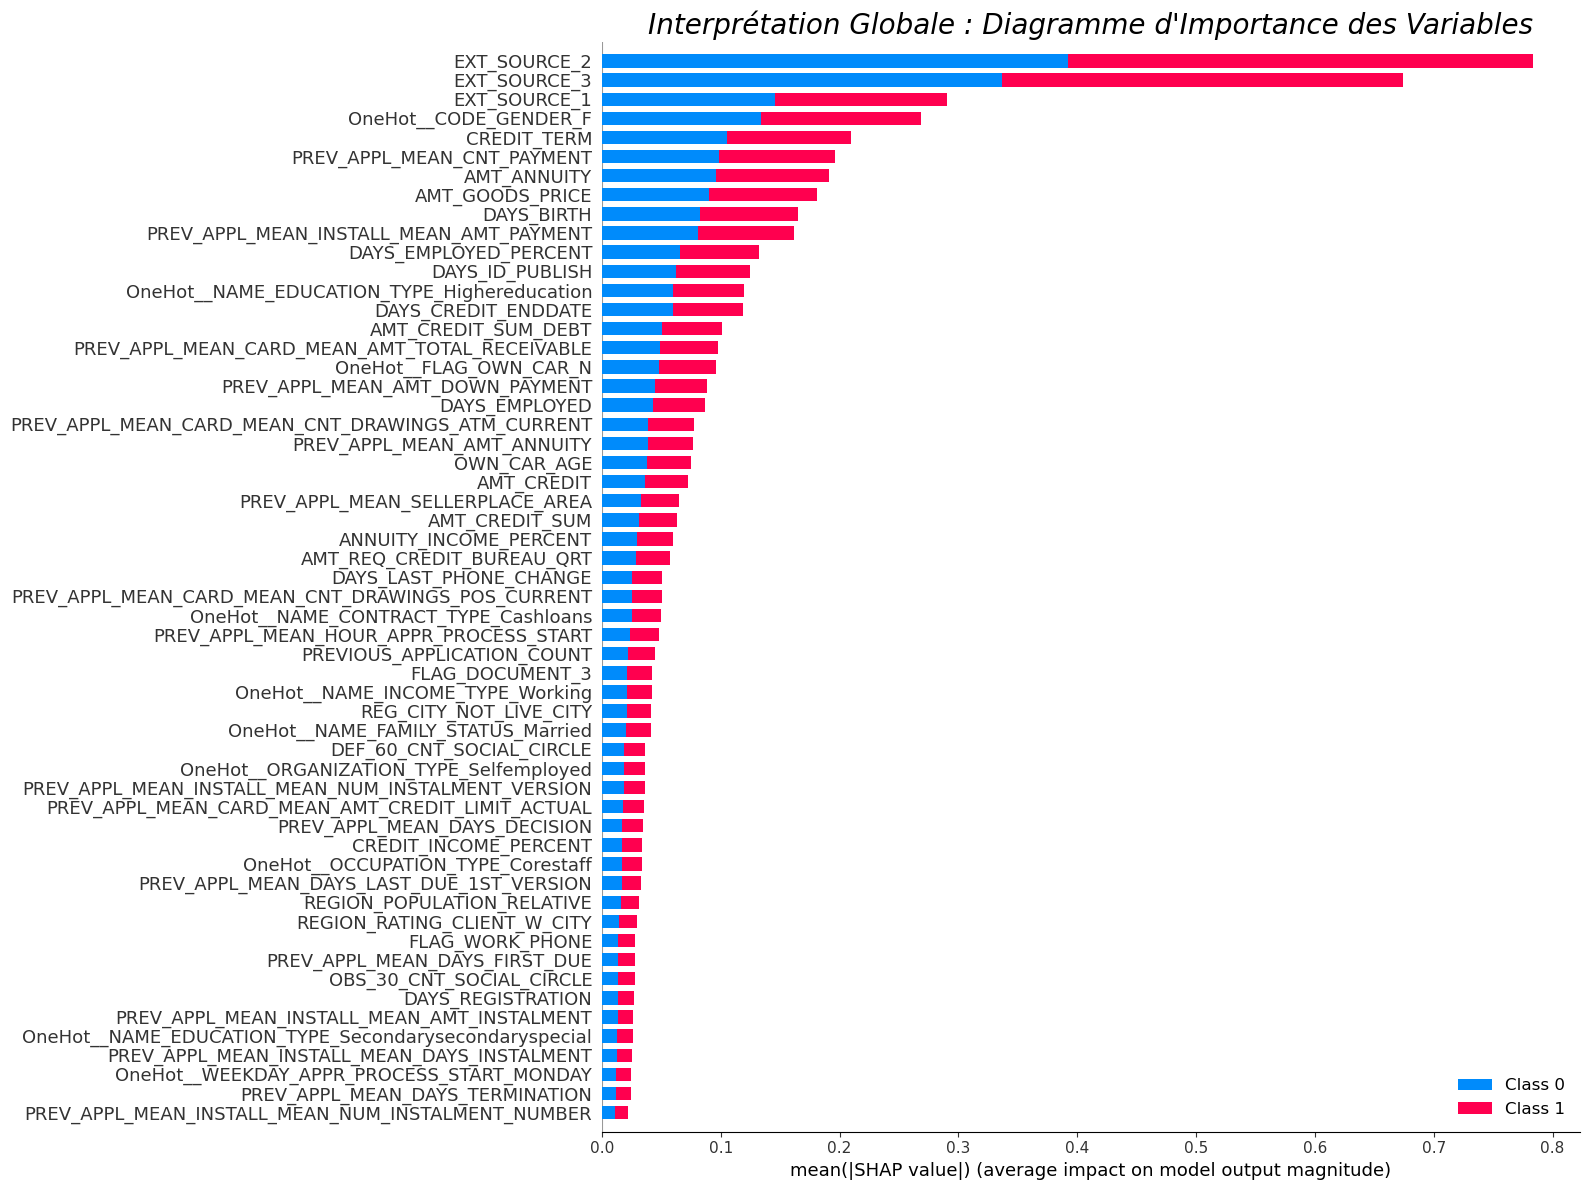

In [43]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 12),
                  plot_type="bar",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

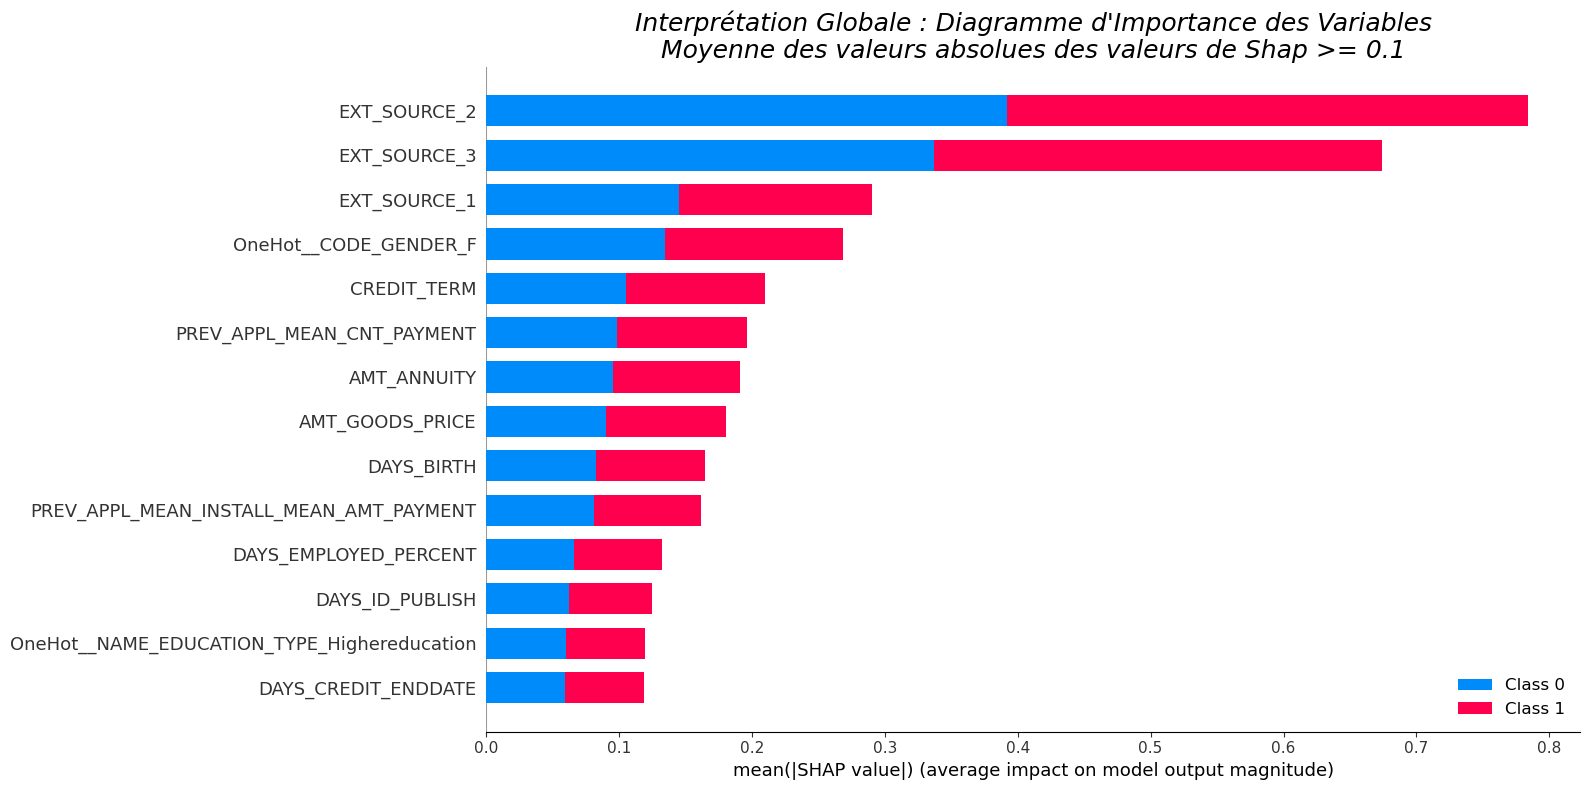

In [44]:
# visualize the impact of each features

shap.summary_plot(shap_values, 
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 8),
                  plot_type="bar",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Diagramme des variables
Les valeurs de Shap sont représentées pour chaque variable dans leur ordre d’importance, chaque point représente une valeur de Shap (pour un client), les points rouges représentent des valeurs élevées de la variable et les points bleus des valeurs basses de la variable.

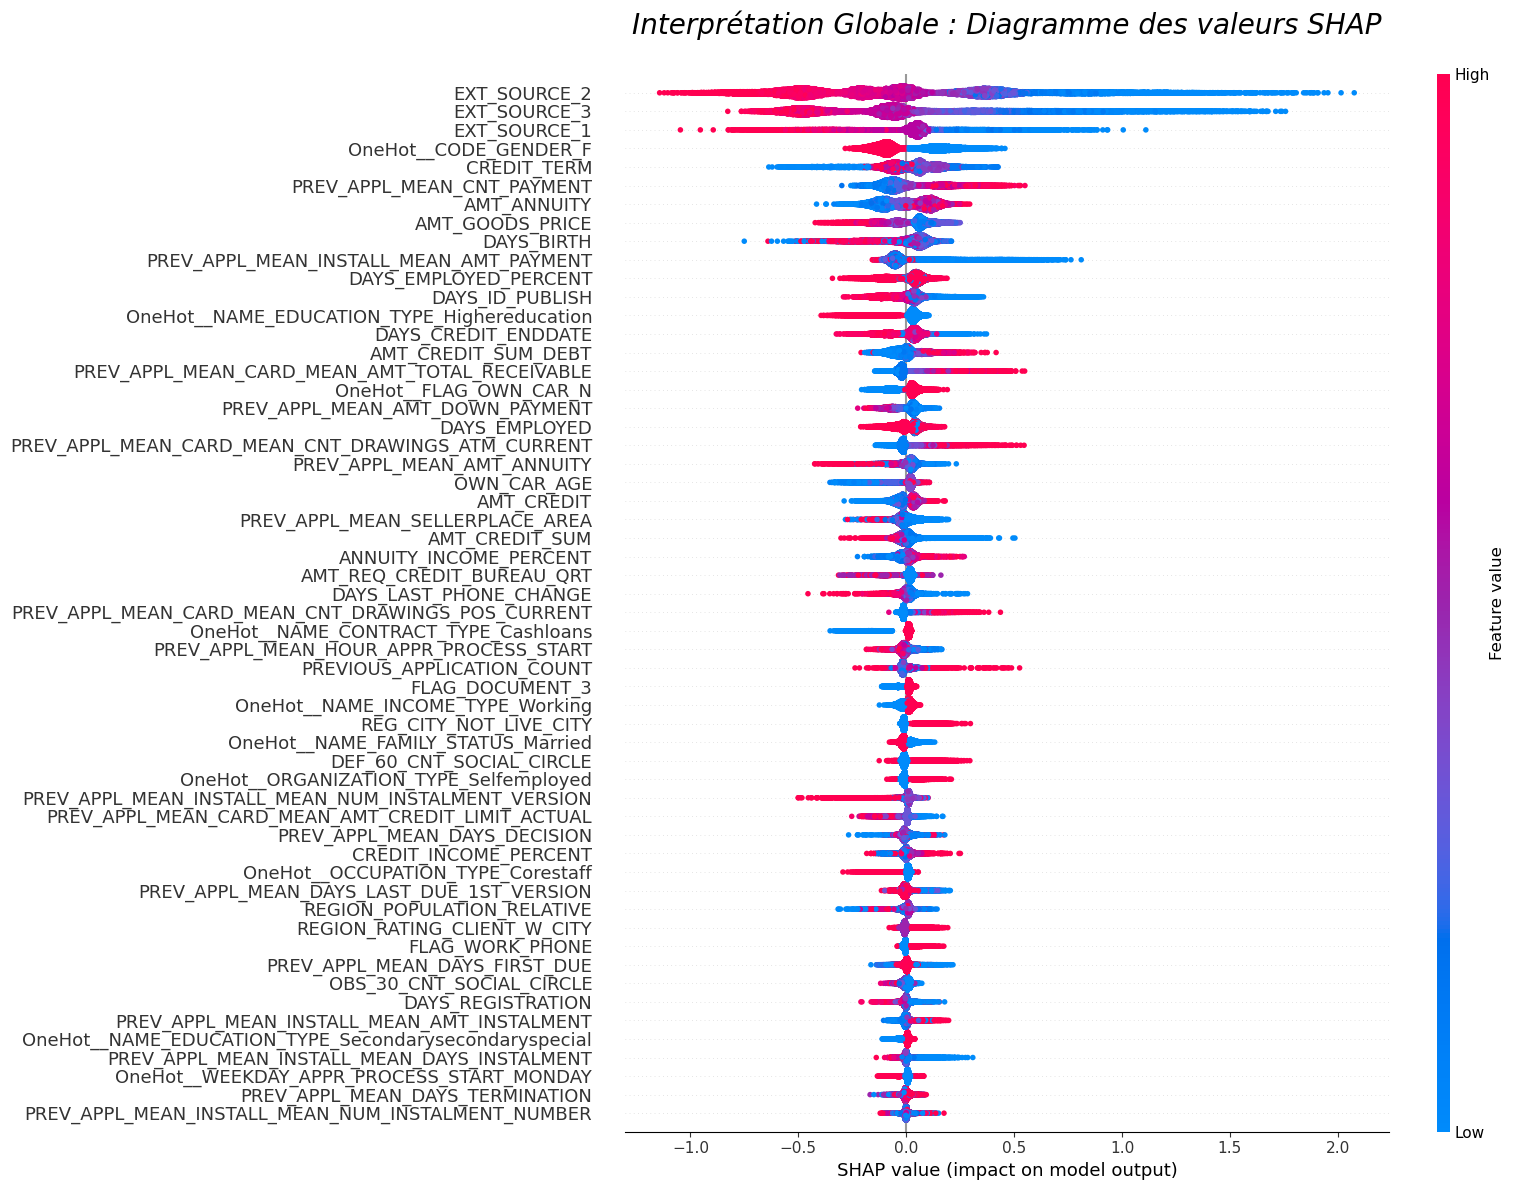

In [45]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=X_train_sample,
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 12),
                  plot_type="dot",
                  max_display=56,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\n", 
          fontsize=20, fontstyle='italic')
plt.tight_layout()
plt.show()

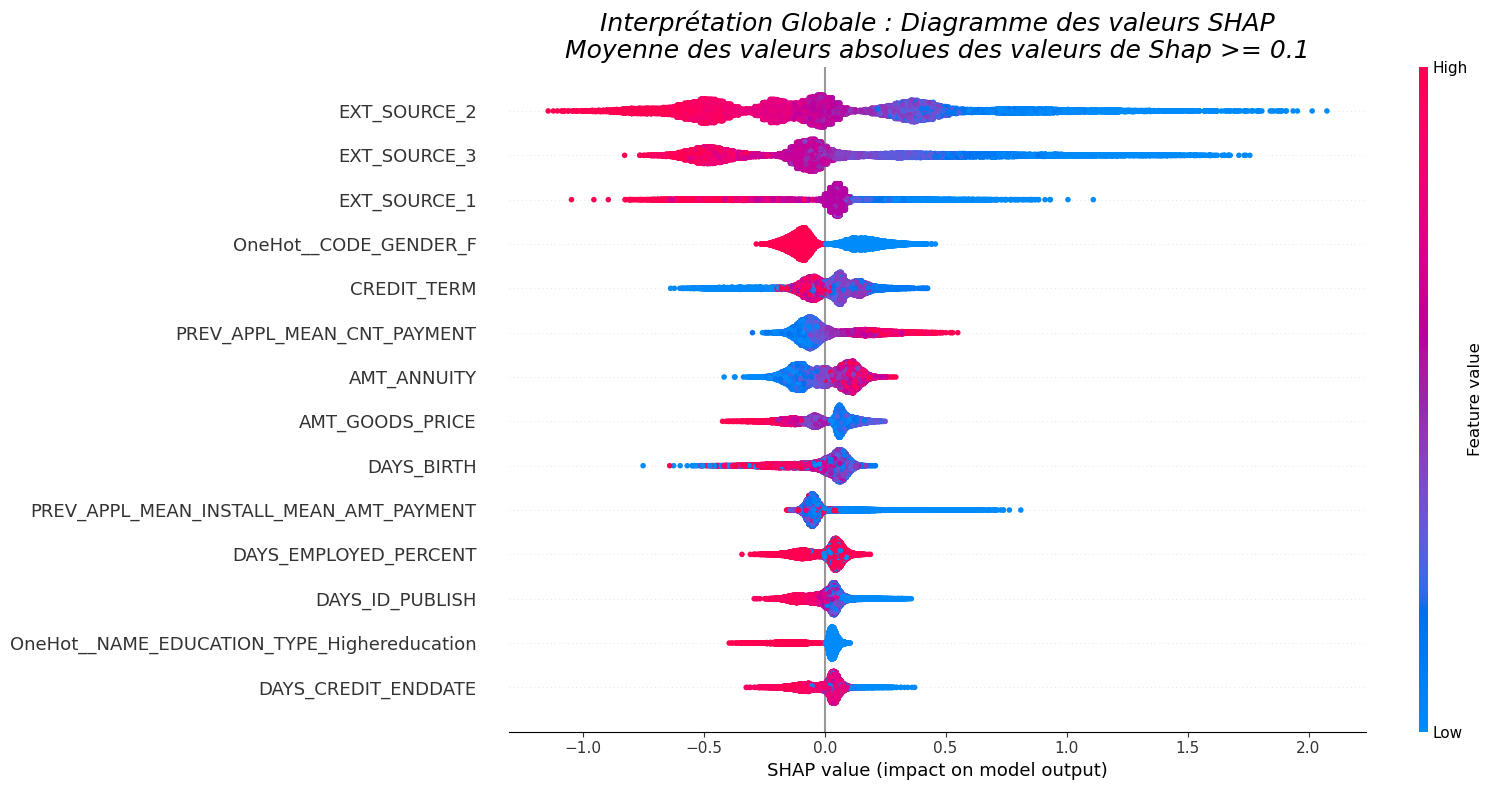

In [46]:
# print the JS visualization code to the notebook
shap.initjs()

shap.summary_plot(shap_values[1], 
                  features=X_train_sample,
                  feature_names=X_train_sample.columns,
                  plot_size=(16, 8),
                  plot_type="dot",
                  max_display=14,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP\nMoyenne des valeurs absolues des valeurs de Shap >= 0.1", 
          fontsize=18, fontstyle='italic')
plt.tight_layout()
plt.show()

### Graphiques des prédictions - 100 individus

In [47]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X_train_sample.iloc[:100,:])

### Graphiques de dépendance

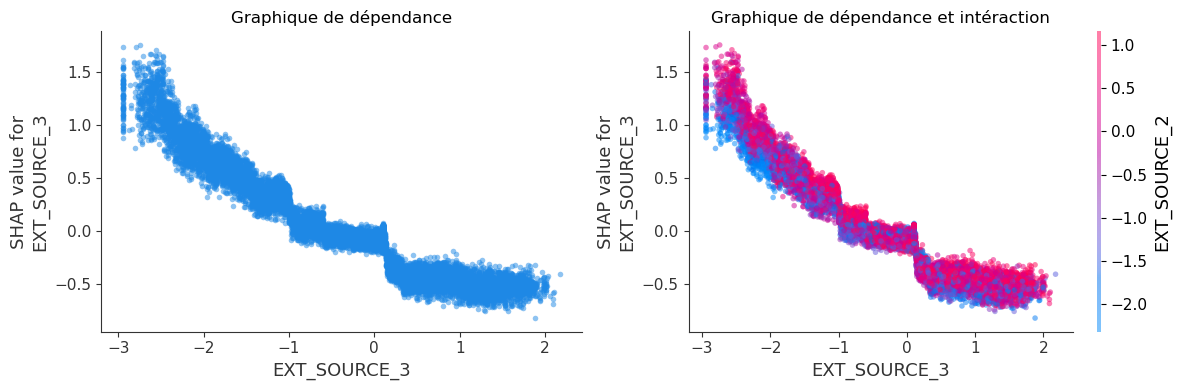

In [48]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1],X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_3", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

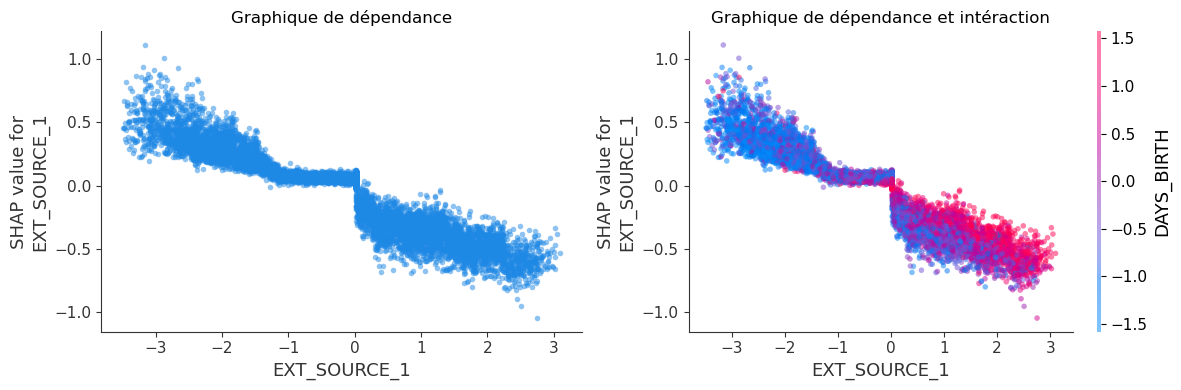

In [49]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("EXT_SOURCE_1", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

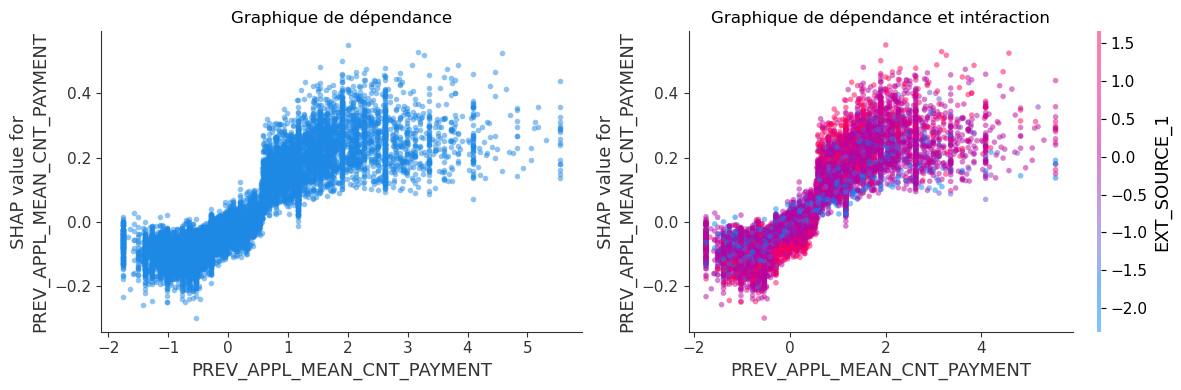

In [50]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("PREV_APPL_MEAN_CNT_PAYMENT", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

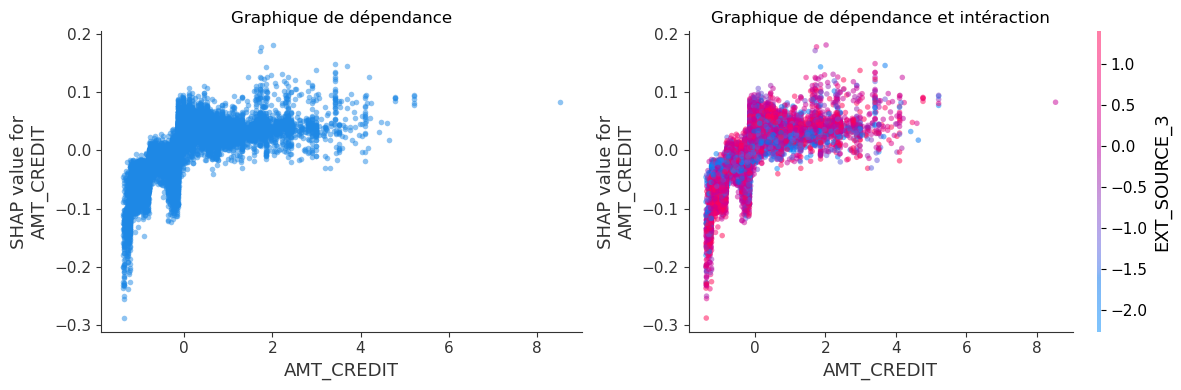

In [51]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("AMT_CREDIT", shap_values[1], X_train_sample, 
                     interaction_index=None, alpha = 0.5, 
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("AMT_CREDIT", shap_values[1], X_train_sample, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.tight_layout()
plt.show()

### PARTIE 2 - FEATURE IMPORTANCE LOCAL

In [52]:
shap_vals = explainer(X_train_sample)

### Exemple client 0

### Graphiques de décision - Version 1

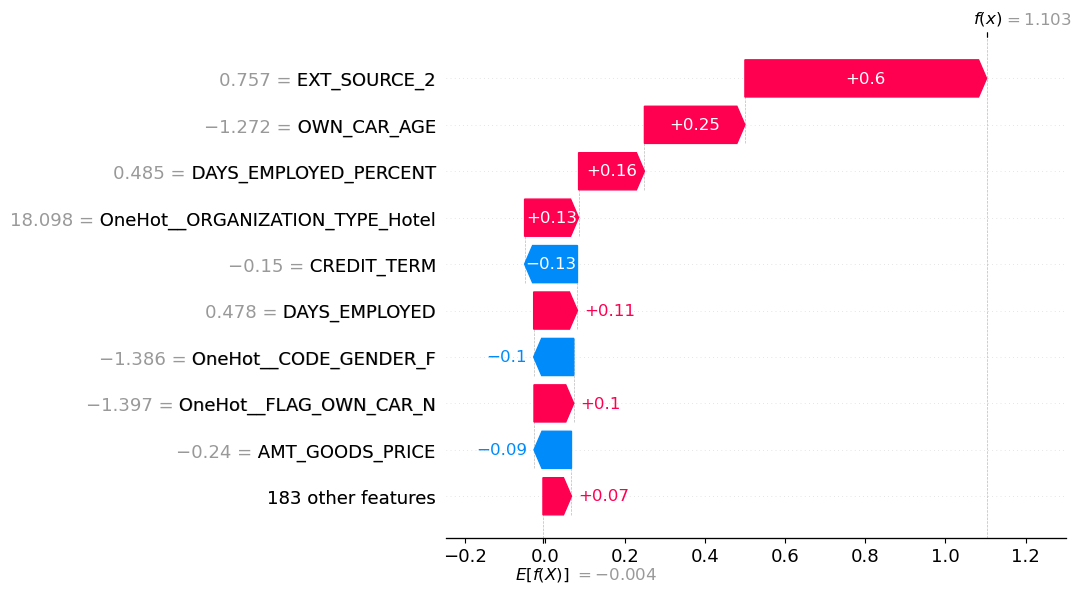

In [53]:
fig=shap.waterfall_plot(shap_vals[0][:, 0],show = False)

plt.show()

### Graphiques de décision - Version 2

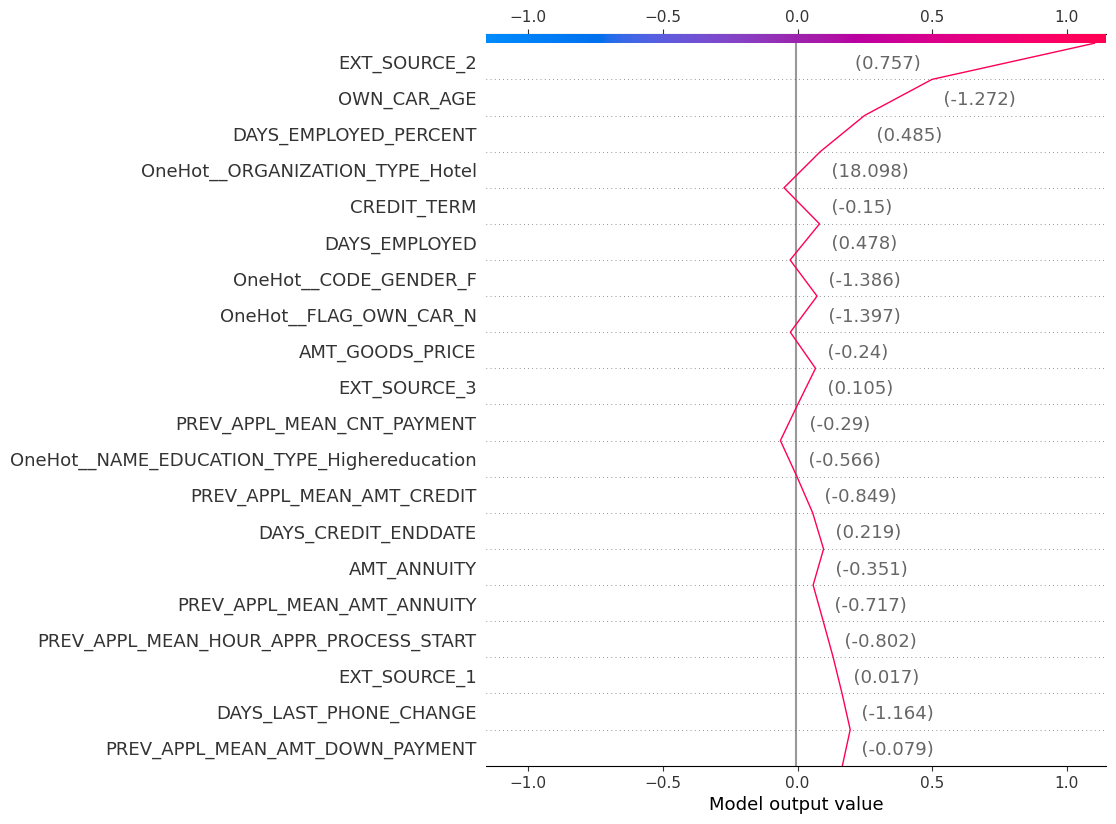

In [54]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][0,:], X_train_sample.iloc[0,:])

### Exemple client 10

### Graphiques de décision - Version 1

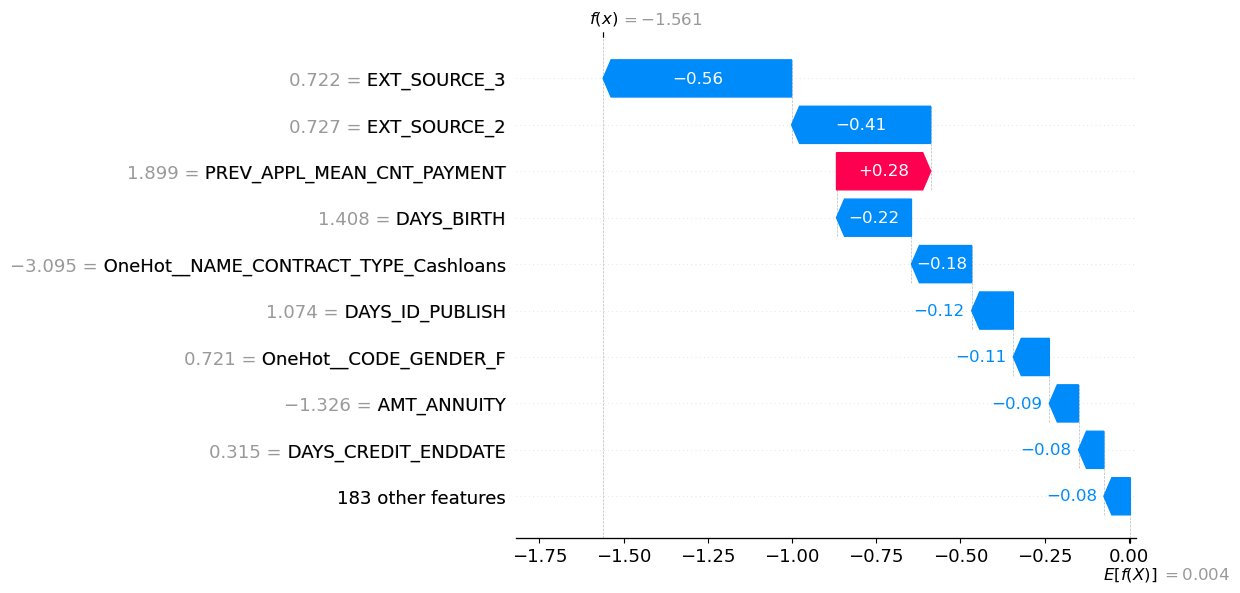

In [55]:
# shap local pour un client
shap.waterfall_plot(shap_vals[10][:, 1],show = False)
#plt.savefig('shap client 10 valid set tot', dpi = 200, bbox_inches = 'tight') 
plt.show()

### Graphiques de décision - Version 2

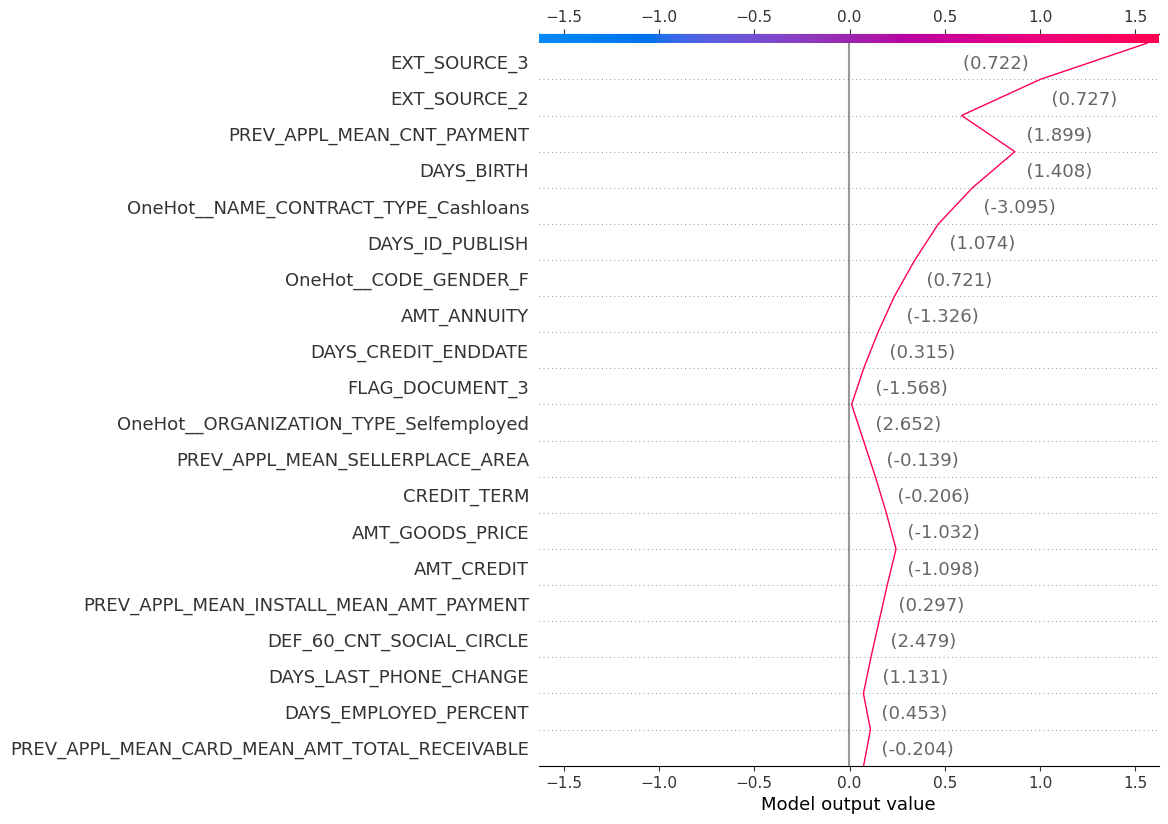

In [56]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values[0][10,:], X_train_sample.iloc[10,:])

### Sérialisation

In [57]:
pickle_out = open("encodage.pkl","wb")
pickle.dump(best_LGBM[0], pickle_out)
pickle_out.close()

In [58]:
pickle_out = open("imputer.pkl","wb")
pickle.dump(best_LGBM[1], pickle_out)
pickle_out.close()

In [59]:
pickle_out = open("scale.pkl","wb")
pickle.dump(best_LGBM[2], pickle_out)
pickle_out.close()

In [60]:
pickle_out = open("sampler.pkl","wb")
pickle.dump(best_LGBM[3], pickle_out)
pickle_out.close()

In [61]:
pickle_out = open("estimateur.pkl","wb")
pickle.dump(best_LGBM[4], pickle_out)
pickle_out.close()

In [62]:
pd.set_option('display.max_columns', None)

In [29]:
best_LGBM[:3]

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['NAME_CONTRACT_TYPE',
                                                   'CODE_GENDER',
                                                   'FLAG_OWN_CAR',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'OCCUPATION_TYPE',
                                                   'WEEKDAY_APPR_PROCESS_START',
                                                   'ORGANIZATION_TYPE'])])),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [30]:
pickle_out = open("trans_Imput_Scale.pkl","wb")
pickle.dump(best_LGBM[:3], pickle_out)
pickle_out.close()